In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pylab
import math
import warnings
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from scipy.stats.distributions import chi2
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pathlib import Path
sns.set()

In [411]:
warnings.filterwarnings("ignore")

In [413]:
file_path = Path('data/POP.csv')

In [415]:
df = pd.read_csv(file_path)

In [417]:
df.head()

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.0,1952-01-01,2019-12-06
1,2019-12-06,156527.0,1952-02-01,2019-12-06
2,2019-12-06,156731.0,1952-03-01,2019-12-06
3,2019-12-06,156943.0,1952-04-01,2019-12-06
4,2019-12-06,157140.0,1952-05-01,2019-12-06


In [419]:
df.dtypes

realtime_start     object
value             float64
date               object
realtime_end       object
dtype: object

In [421]:
df.columns.to_list()

['realtime_start', 'value', 'date', 'realtime_end']

In [425]:
df.value_counts()

realtime_start  value       date        realtime_end
2019-12-06      156309.000  1952-01-01  2019-12-06      1
                273553.000  1997-09-01  2019-12-06      1
                270878.000  1996-11-01  2019-12-06      1
                271125.000  1996-12-01  2019-12-06      1
                271360.000  1997-01-01  2019-12-06      1
                                                       ..
                214625.000  1974-11-01  2019-12-06      1
                214782.000  1974-12-01  2019-12-06      1
                214931.000  1975-01-01  2019-12-06      1
                215065.000  1975-02-01  2019-12-06      1
                330309.946  2019-12-01  2019-12-06      1
Name: count, Length: 816, dtype: int64

In [427]:
len(df)

816

In [429]:
df.describe()

,value
count,816.000000
mean,243847.767826
std,50519.140567
min,156309.000000
25%,201725.250000
50%,239557.500000
75%,289364.250000
max,330309.946000


In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   realtime_start  816 non-null    object 
 1   value           816 non-null    float64
 2   date            816 non-null    object 
 3   realtime_end    816 non-null    object 
dtypes: float64(1), object(3)
memory usage: 25.6+ KB


In [433]:
df.isna()

,realtime_start,value,date,realtime_end
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
811,False,False,False,False
812,False,False,False,False
813,False,False,False,False
814,False,False,False,False


In [435]:
df.isna().sum()

realtime_start    0
value             0
date              0
realtime_end      0
dtype: int64

In [65]:
# df.fillna(method = 'ffill', inplace = True)

In [254]:
df.dropna(inplace = True)

In [226]:
# df.Revenue.fillna(df.Revenue.mean(), inplace = True)

In [437]:
df.isna().sum()

realtime_start    0
value             0
date              0
realtime_end      0
dtype: int64

In [439]:
df

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.000,1952-01-01,2019-12-06
1,2019-12-06,156527.000,1952-02-01,2019-12-06
2,2019-12-06,156731.000,1952-03-01,2019-12-06
3,2019-12-06,156943.000,1952-04-01,2019-12-06
4,2019-12-06,157140.000,1952-05-01,2019-12-06
...,...,...,...,...
811,2019-12-06,329591.333,2019-08-01,2019-12-06
812,2019-12-06,329785.872,2019-09-01,2019-12-06
813,2019-12-06,329982.035,2019-10-01,2019-12-06
814,2019-12-06,330154.949,2019-11-01,2019-12-06


In [441]:
df_copy = df.copy()

<Axes: title={'center': 'Revenue Prices'}>

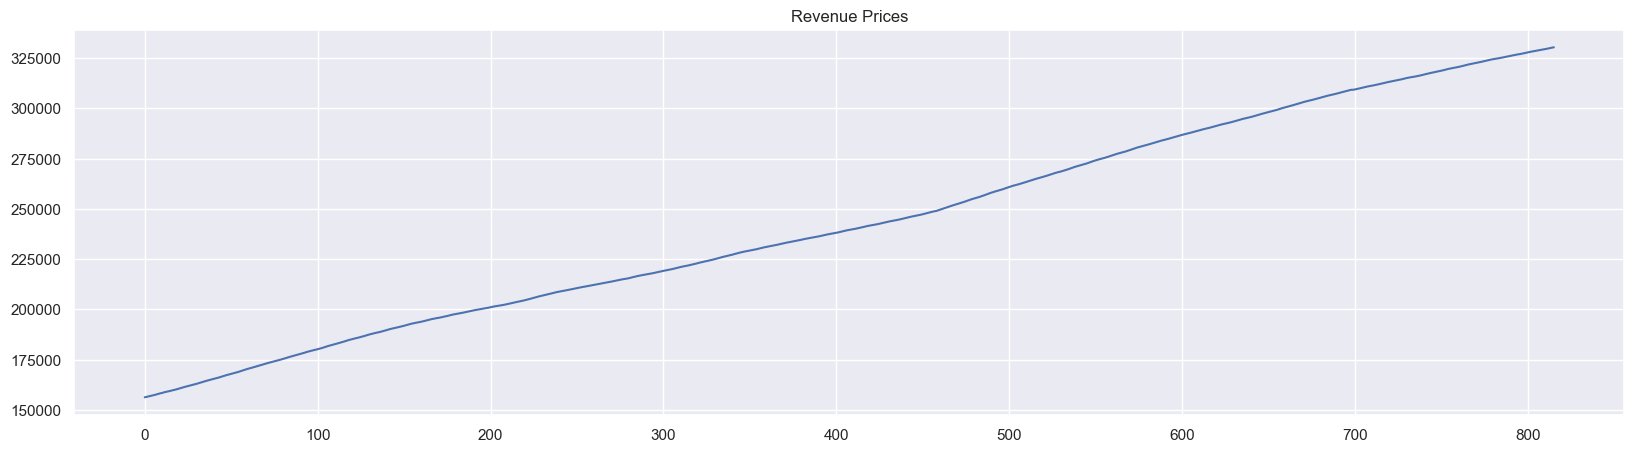

In [443]:
df.value.plot(figsize = (20, 5), title = 'Revenue Prices')

In [447]:
df.value.max()

330309.946

In [449]:
df.value.min()

156309.0

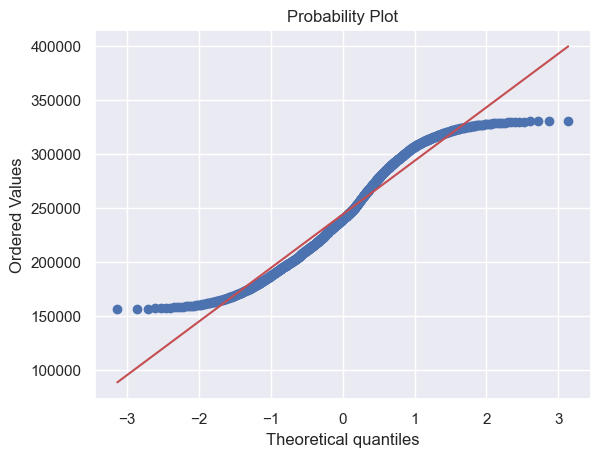

In [451]:
scipy.stats.probplot(df.value, plot = pylab)
plt.show()

In [455]:
# df['date'] = pd.to_datetime(df.Period, format='%Y-%d-%m', errors='coerce')
df['date'] = pd.to_datetime(df.date)

In [457]:
df.dtypes

realtime_start            object
value                    float64
date              datetime64[ns]
realtime_end              object
dtype: object

In [459]:
df.date.describe()

count                    816
mean     1985-12-15 23:00:00
min      1952-01-01 00:00:00
25%      1968-12-24 06:00:00
50%      1985-12-16 12:00:00
75%      2002-12-08 18:00:00
max      2019-12-01 00:00:00
Name: date, dtype: object

In [461]:
df.date

0     1952-01-01
1     1952-02-01
2     1952-03-01
3     1952-04-01
4     1952-05-01
         ...    
811   2019-08-01
812   2019-09-01
813   2019-10-01
814   2019-11-01
815   2019-12-01
Name: date, Length: 816, dtype: datetime64[ns]

In [463]:
df.index

RangeIndex(start=0, stop=816, step=1)

In [465]:
df.set_index('date', inplace = True)

In [467]:
df.index

DatetimeIndex(['1952-01-01', '1952-02-01', '1952-03-01', '1952-04-01',
               '1952-05-01', '1952-06-01', '1952-07-01', '1952-08-01',
               '1952-09-01', '1952-10-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='date', length=816, freq=None)

In [469]:
df.head(3)

,realtime_start,value,realtime_end
date,,,
1952-01-01,2019-12-06,156309.0,2019-12-06
1952-02-01,2019-12-06,156527.0,2019-12-06
1952-03-01,2019-12-06,156731.0,2019-12-06


In [471]:
size = int(len(df)*0.8)
df_train = df.iloc[:size]
df_test = df.iloc[size:]
df_copy2 = df.copy()
df = df_train

In [473]:
df.tail(2)

,realtime_start,value,realtime_end
date,,,
2006-03-01,2019-12-06,298060.0,2019-12-06
2006-04-01,2019-12-06,298281.0,2019-12-06


In [475]:
df_test.head(2)

,realtime_start,value,realtime_end
date,,,
2006-05-01,2019-12-06,298496.0,2019-12-06
2006-06-01,2019-12-06,298739.0,2019-12-06


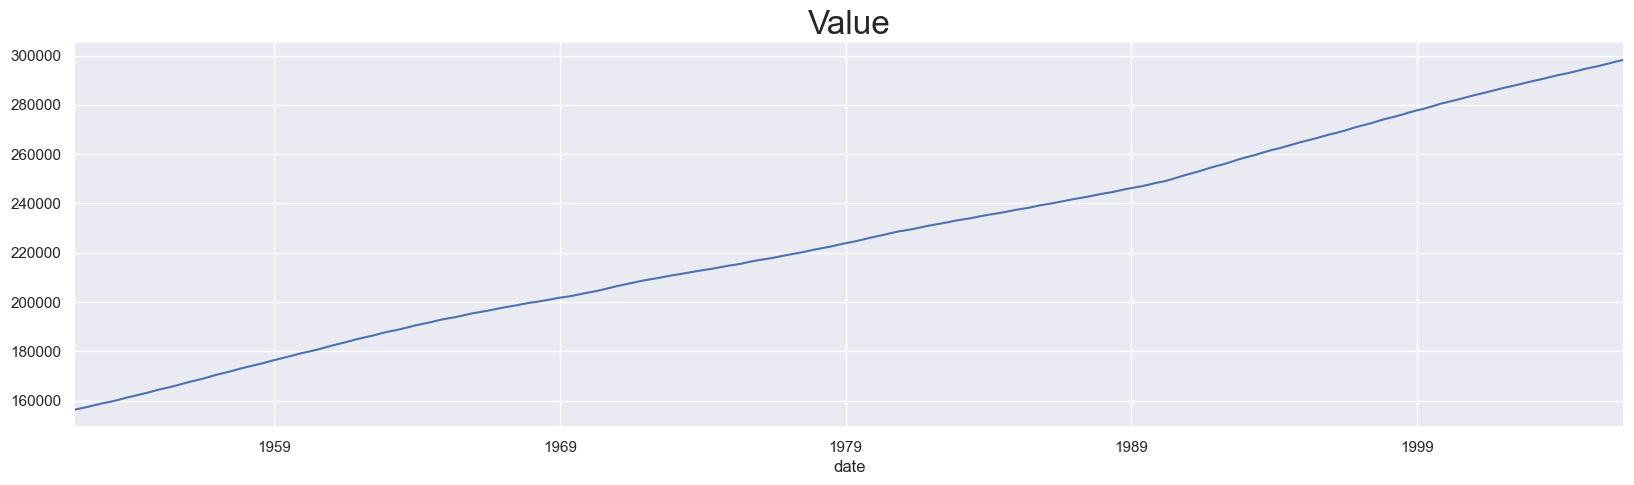

In [477]:
df.value.plot(figsize = (20, 5))
plt.title('Value', size = 24)
plt.show()

In [479]:
sts.adfuller(df.value)

(0.7734022992782621,
 0.9911944710465898,
 18,
 633,
 {'1%': -3.4407228537258865,
  '5%': -2.866116759417764,
  '10%': -2.5692073421780983},
 5065.426525796296)

In [485]:
df.index

DatetimeIndex(['1952-01-01', '1952-02-01', '1952-03-01', '1952-04-01',
               '1952-05-01', '1952-06-01', '1952-07-01', '1952-08-01',
               '1952-09-01', '1952-10-01',
               ...
               '2005-07-01', '2005-08-01', '2005-09-01', '2005-10-01',
               '2005-11-01', '2005-12-01', '2006-01-01', '2006-02-01',
               '2006-03-01', '2006-04-01'],
              dtype='datetime64[ns]', name='date', length=652, freq=None)

It is in monthly basis

In [489]:
# df = df_train

In [550]:
print(df.index.freq)

None


In [552]:
df = df.resample('M').first()  # Use last value of the month to avoid NaNs

'M': Resamples to the end of each calendar month (e.g., January 31st, February 28th/29th).\
'ME': Resamples to the last business day of each month (e.g., January 31st, but February might end on the 28th or 29th based on weekends).\
Use 'M' if you want calendar months and 'ME' if you want the last business day.

In [558]:
print(df.asfreq('D').isna().sum())
print(df.asfreq('b').isna().sum())
print(df.asfreq('ME').isna().sum()) # business day months
# print(df.asfreq('a').isna().sum())
# print(df.asfreq('M').isna().sum())

realtime_start    19162
value             19162
realtime_end      19162
dtype: int64
realtime_start    13687
value             13687
realtime_end      13687
dtype: int64
realtime_start    0
value             0
realtime_end      0
dtype: int64


In [560]:
df.isna().sum()

realtime_start    0
value             0
realtime_end      0
dtype: int64

In [562]:
df.index.freq

<MonthEnd>

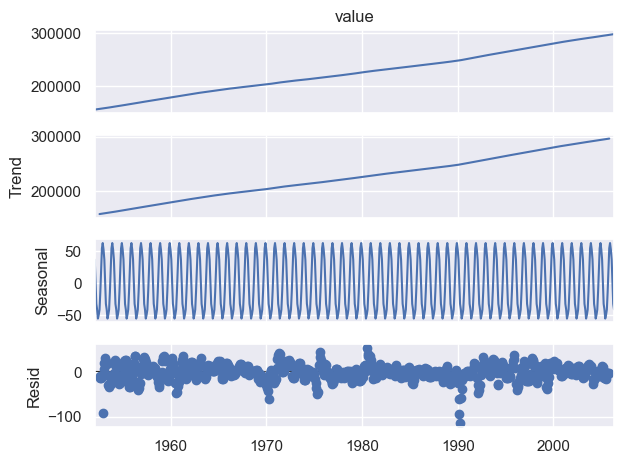

In [564]:
seasonal_additive = seasonal_decompose(df.value, model = 'additive')
seasonal_additive.plot()
plt.show()

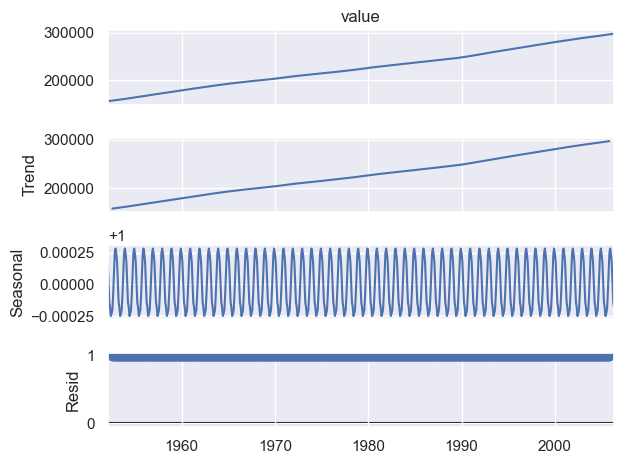

In [572]:
seasonal_mul = seasonal_decompose(df.value, model = 'multiplicative')
seasonal_mul.plot()
plt.show()

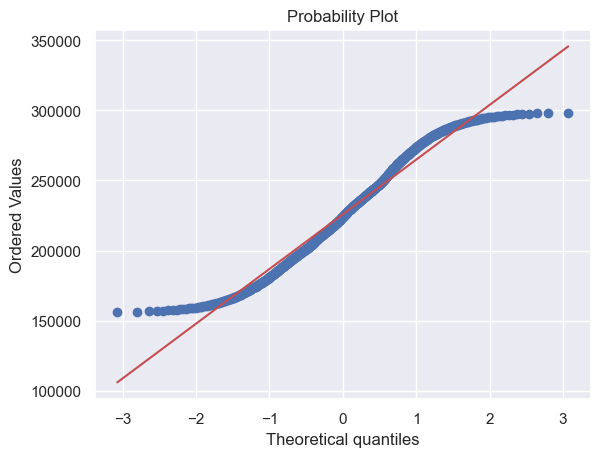

In [574]:
scipy.stats.probplot(df.value, plot = pylab)
plt.show()

In [582]:
df.value.value_counts()

value
156309.0    1
246906.0    1
243639.0    1
243809.0    1
243981.0    1
           ..
204156.0    1
204401.0    1
204607.0    1
204830.0    1
298281.0    1
Name: count, Length: 652, dtype: int64

In [586]:
df.value.describe()

count       652.000000
mean     225847.973926
std       39495.717136
min      156309.000000
25%      194471.750000
50%      224144.000000
75%      257626.250000
max      298281.000000
Name: value, dtype: float64

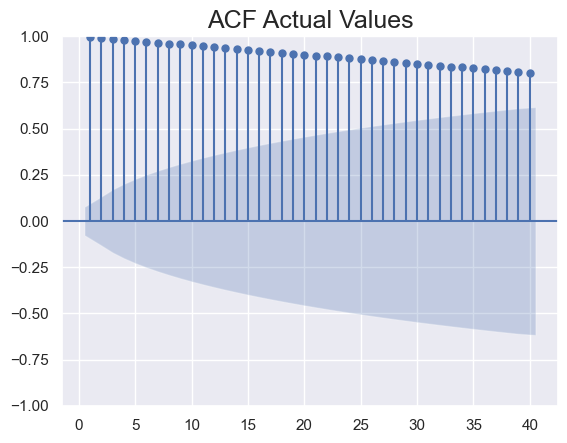

In [594]:
sgt.plot_acf(df.value, lags = 40, zero = False)
plt.title('ACF Actual Values', size = 18)
plt.show()

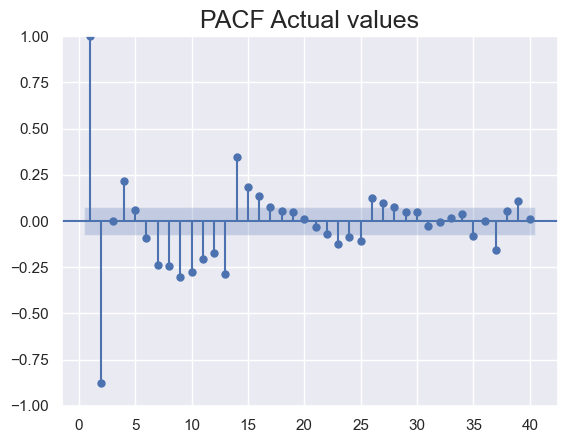

In [598]:
sgt.plot_pacf(df.value, lags = 40, zero = False, method = ('ols'))
plt.title('PACF Actual values', size = 18)
plt.show()

In [600]:
sts.adfuller(df.value)

(0.7734022992782621,
 0.9911944710465898,
 18,
 633,
 {'1%': -3.4407228537258865,
  '5%': -2.866116759417764,
  '10%': -2.5692073421780983},
 5065.426525796296)

In [685]:
df['diff_values'] = df.value.diff(1)

In [687]:
df.diff_values.head()

date
1952-01-31      NaN
1952-02-29    218.0
1952-03-31    204.0
1952-04-30    212.0
1952-05-31    197.0
Freq: ME, Name: diff_values, dtype: float64

In [689]:
sts.adfuller(df.diff_values[1:])

(-2.3836384694037243,
 0.14640767852737369,
 17,
 633,
 {'1%': -3.4407228537258865,
  '5%': -2.866116759417764,
  '10%': -2.5692073421780983},
 5057.297590909518)

In [662]:
df['log_values'] = np.log(df['value'])
df['diff_values'] = df.log_values.diff(1)

In [664]:
sts.adfuller(df.diff_values[1:])

(-1.9129698026077946,
 0.3259845204412509,
 16,
 634,
 {'1%': -3.4407064257994495,
  '5%': -2.866109523416927,
  '10%': -2.5692034867497937},
 -10435.09985344101)

In [670]:
df['returns'] = df.value.pct_change(1).mul(100)

In [672]:
sts.adfuller(df.returns[1:])

(-1.9128727657110192,
 0.3260297981742781,
 16,
 634,
 {'1%': -3.4407064257994495,
  '5%': -2.866109523416927,
  '10%': -2.5692034867497937},
 -4631.297226689722)

If the data is still not stationary, it might have seasonality. Try applying seasonal differencing or further differencing. 

In [695]:
df['diff_seasonal'] = df.diff_values.diff(12) # as monthly

In [697]:
sts.adfuller(df.diff_seasonal[13:]) # 12 + 1

(-5.118855211057441,
 1.2845399341409314e-05,
 13,
 625,
 {'1%': -3.440856177517568, '5%': -2.86617548304384, '10%': -2.56923863104},
 4951.047028491057)

In [699]:
df.diff_seasonal[13:]

date
1953-02-28   -21.0
1953-03-31   -25.0
1953-04-30    -5.0
1953-05-31    -8.0
1953-06-30     8.0
              ... 
2005-12-31    -4.0
2006-01-31    -4.0
2006-02-28    16.0
2006-03-31    24.0
2006-04-30    18.0
Freq: ME, Name: diff_seasonal, Length: 639, dtype: float64

diff() if not work then use log if there is no seasonality\
seasonal_diff with diff() if there is seasonality. \
or if only diff() works then fine, in case it wont work

In [704]:
df.diff_seasonal.mean()

0.19874804381846636

In [706]:
df.diff_seasonal.var()

464.00902664331556

In [710]:
math.sqrt(df.diff_seasonal.var())

21.540868753216884

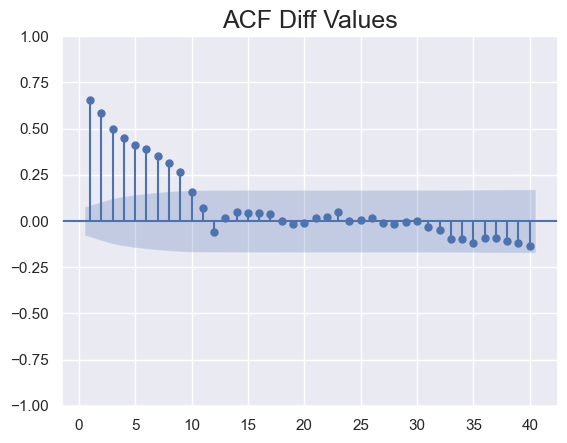

In [714]:
sgt.plot_acf(df.diff_seasonal[13:], lags = 40, zero = False)
plt.title('ACF Diff Values', size = 18)
plt.show()

Last lag out of blue zone, here 10

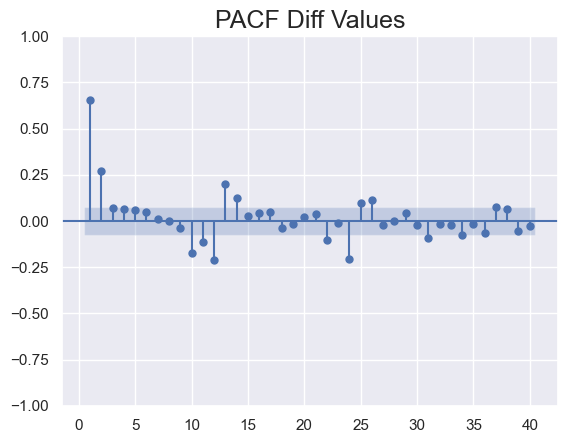

In [718]:
sgt.plot_pacf(df.diff_seasonal[13:], lags = 40, zero = False, method = ('ols'))
plt.title('PACF Diff Values', size = 18)
plt.show()

Lag where after it there is significant decrease (out of blue area, here it is 1)

In [731]:
model_diff_ar1_ma1 = SARIMAX(df.diff_seasonal[13:], order = (1, 0, 1))
print(model_diff_ar1_ma1.fit().summary())

                               SARIMAX Results                                
Dep. Variable:          diff_seasonal   No. Observations:                  639
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -2659.678
Date:                Mon, 24 Feb 2025   AIC                           5325.356
Time:                        05:17:52   BIC                           5338.736
Sample:                    02-28-1953   HQIC                          5330.550
                         - 04-30-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8845      0.017     50.898      0.000       0.850       0.919
ma.L1         -0.4370      0.031    -14.180      0.000      -0.497      -0.377
sigma2       241.1529      5.974     40.367      0.0

In [741]:
model_diff_ar1_ma9 = SARIMAX(df.diff_seasonal[13:], order = (1, 0, 9))
print(model_diff_ar1_ma9.fit().summary())

                               SARIMAX Results                                
Dep. Variable:          diff_seasonal   No. Observations:                  639
Model:               SARIMAX(1, 0, 9)   Log Likelihood               -2627.182
Date:                Mon, 24 Feb 2025   AIC                           5276.364
Time:                        05:19:51   BIC                           5325.423
Sample:                    02-28-1953   HQIC                          5295.408
                         - 04-30-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4816      0.067      7.239      0.000       0.351       0.612
ma.L1         -0.1475      0.067     -2.213      0.027      -0.278      -0.017
ma.L2          0.1607      0.038      4.283      0.0

In [743]:
model_diff_ar1_ma10 = SARIMAX(df.diff_seasonal[13:], order = (1, 0, 10))
print(model_diff_ar1_ma10.fit().summary())

                               SARIMAX Results                                
Dep. Variable:          diff_seasonal   No. Observations:                  639
Model:              SARIMAX(1, 0, 10)   Log Likelihood               -2617.730
Date:                Mon, 24 Feb 2025   AIC                           5259.459
Time:                        05:20:10   BIC                           5312.978
Sample:                    02-28-1953   HQIC                          5280.234
                         - 04-30-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2430      0.081      2.991      0.003       0.084       0.402
ma.L1          0.0612      0.083      0.735      0.462      -0.102       0.224
ma.L2          0.3655      0.035     10.485      0.0

In [755]:
df['res_ar1_ma1'] = model_diff_ar1_ma1.fit().resid

In [759]:
sts.adfuller(df.res_ar1_ma1[13:])

(-8.890843832185734,
 1.2437515378570025e-14,
 11,
 627,
 {'1%': -3.440822526288827,
  '5%': -2.8661606613087542,
  '10%': -2.5692307337540603},
 4946.440517160947)

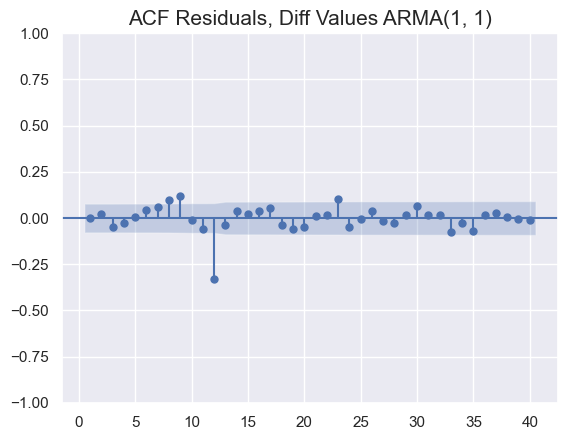

In [765]:
sgt.plot_acf(df.res_ar1_ma1[13:], zero = False, lags = 40)
plt.title('ACF Residuals, Diff Values ARMA(1, 1)', size = 15)
plt.show()

It can be improved so ARMA(1, 1) is not an option.

In [768]:
df['res_ar1_ma9'] = model_diff_ar1_ma9.fit().resid

In [770]:
sts.adfuller(df.res_ar1_ma9[13:])

(-6.666857034434286,
 4.6939412972735705e-09,
 13,
 625,
 {'1%': -3.440856177517568, '5%': -2.86617548304384, '10%': -2.56923863104},
 4931.020257442431)

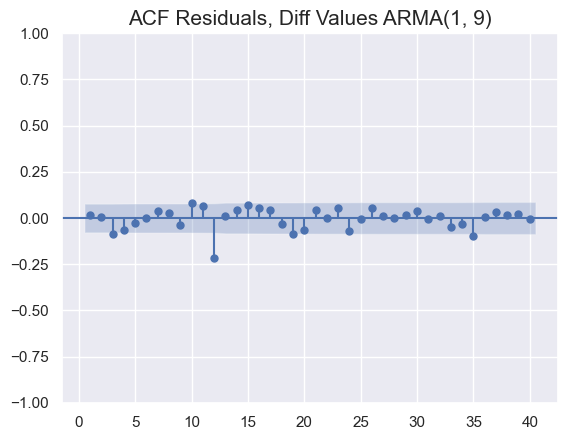

In [772]:
sgt.plot_acf(df.res_ar1_ma9[13:], zero = False, lags = 40)
plt.title('ACF Residuals, Diff Values ARMA(1, 9)', size = 15)
plt.show()

In [774]:
df['res_ar1_ma10'] = model_diff_ar1_ma10.fit().resid

In [776]:
sts.adfuller(df.res_ar1_ma10[13:])

(-6.59372850126041,
 7.00975112977318e-09,
 13,
 625,
 {'1%': -3.440856177517568, '5%': -2.86617548304384, '10%': -2.56923863104},
 4922.409269632657)

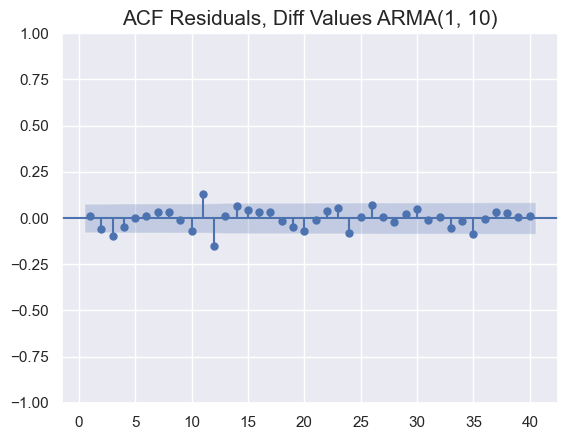

In [778]:
sgt.plot_acf(df.res_ar1_ma10[13:], zero = False, lags = 40)
plt.title('ACF Residuals, Diff Values ARMA(1, 10)', size = 15)
plt.show()

In [782]:
import statsmodels.api as sm

In [792]:
# Ljung-Box Test
ljung_box_result = sm.stats.acorr_ljungbox(df.res_ar1_ma10[13:],lags=[40], return_df=True)
print(ljung_box_result)

      lb_stat  lb_pvalue
40  72.785294   0.001168


Text(0.5, 1.0, 'Histogram of Residuals')

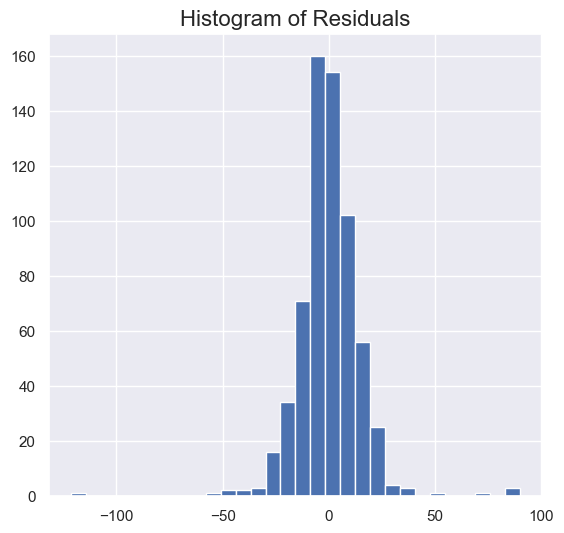

In [828]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.hist(df.res_ar1_ma10[13:], bins=30)
plt.title('Histogram of Residuals', size = 16)
# plt.subplot(122)
# sm.qqplot(df.res_ar1_ma10[13:], line='s')
# plt.title('Q-Q Plot')
# plt.show()

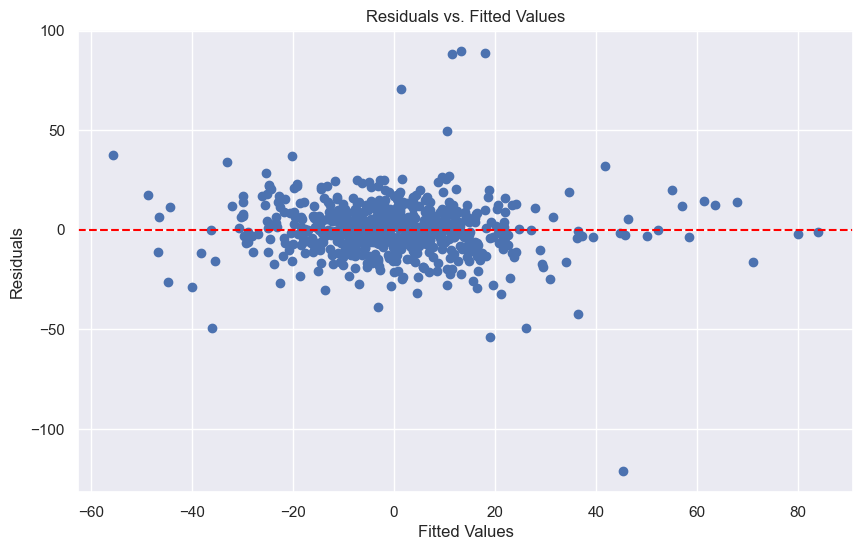

In [834]:
# Residuals vs. Fitted Values
fitted_values = model_diff_ar1_ma10.fit().fittedvalues
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, df.res_ar1_ma10[13:])
plt.axhline(y=0, linestyle='--', color='red')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [836]:
from scipy.stats.distributions import chi2

In [838]:
def LLR_test(mod_1, mod_2, DF=1): # DF -> degrees of freedom
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [860]:
LLR_test(model_diff_ar1_ma1, model_diff_ar1_ma9, DF = 8)

0.0

In [862]:
LLR_test(model_diff_ar1_ma1, model_diff_ar1_ma10, DF = 9)

0.0

In [866]:
LLR_test(model_diff_ar1_ma9, model_diff_ar1_ma10, DF = 1) #default df = 1

0.0

In [846]:
LLR_test(model_diff_ar1_ma10, model_diff_ar1_ma9)

1.0

In [852]:
print(model_diff_ar1_ma1.fit().aic, ' ', model_diff_ar1_ma1.fit().llf)

5325.356045897352   -2659.678022948676


In [854]:
print(model_diff_ar1_ma9.fit().aic, ' ', model_diff_ar1_ma9.fit().llf)

5276.364386040958   -2627.182193020479


In [856]:
print(model_diff_ar1_ma10.fit().aic, ' ', model_diff_ar1_ma10.fit().llf)

5259.459236798948   -2617.729618399474


The AIC score in ARMA(1, 10) is lower, and its LLF score is higher than other models, so choose this.

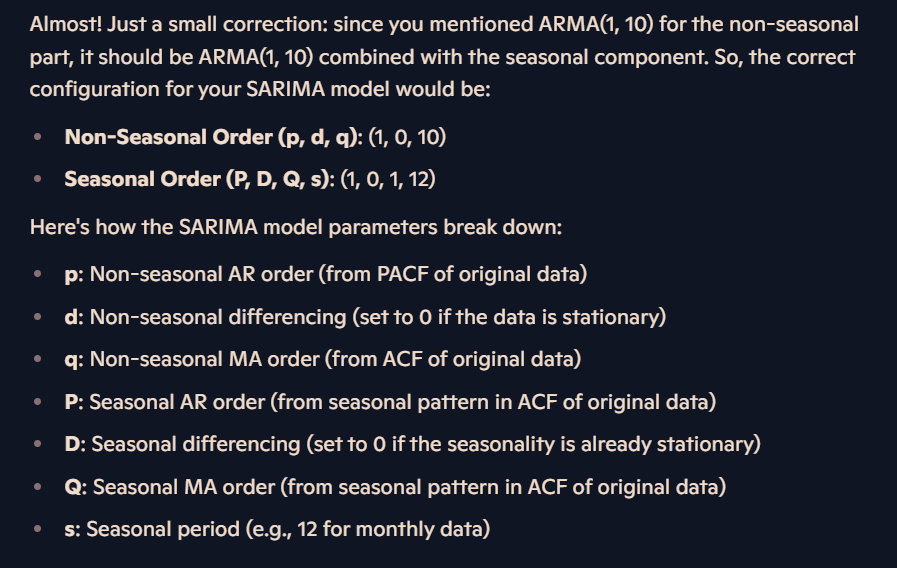

In [893]:
model_diff_s_ar1_ma1 = SARIMAX(df.diff_seasonal[13:], order = (1, 0, 1), 
                               seasonal_order = (1, 0, 1, 12))

In [897]:
print(model_diff_s_ar1_ma1.fit().summary())

                                     SARIMAX Results                                      
Dep. Variable:                      diff_seasonal   No. Observations:                  639
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -2556.849
Date:                            Mon, 24 Feb 2025   AIC                           5123.699
Time:                                    05:58:50   BIC                           5145.999
Sample:                                02-28-1953   HQIC                          5132.355
                                     - 04-30-2006                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9771      0.010     93.350      0.000       0.957       0.998
ma.L1         -0.5552      0.024   

In [913]:
model_diff_s_ar1_ma2 = SARIMAX(df.diff_seasonal[13:], order = (1, 0, 2), 
                               seasonal_order = (1, 0, 1, 12))

In [915]:
print(model_diff_s_ar1_ma2.fit().summary())

                                      SARIMAX Results                                       
Dep. Variable:                        diff_seasonal   No. Observations:                  639
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 12)   Log Likelihood               -2556.744
Date:                              Mon, 24 Feb 2025   AIC                           5125.488
Time:                                      06:00:07   BIC                           5152.247
Sample:                                  02-28-1953   HQIC                          5135.875
                                       - 04-30-2006                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9781      0.010     94.539      0.000       0.958       0.998
ma.L1         -0.54

In [919]:
model_diff_s_ar1_ma10 = SARIMAX(df.diff_seasonal[13:], order = (1, 0, 10), 
                               seasonal_order = (1, 0, 1, 12))

In [921]:
print(model_diff_s_ar1_ma10.fit().summary())

                                       SARIMAX Results                                       
Dep. Variable:                         diff_seasonal   No. Observations:                  639
Model:             SARIMAX(1, 0, 10)x(1, 0, [1], 12)   Log Likelihood               -2552.447
Date:                               Mon, 24 Feb 2025   AIC                           5132.894
Time:                                       06:00:39   BIC                           5195.332
Sample:                                   02-28-1953   HQIC                          5157.131
                                        - 04-30-2006                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9736      0.014     70.844      0.000       0.947       1.001
ma.L1      

In [923]:
LLR_test(model_diff_s_ar1_ma1, model_diff_s_ar1_ma2)

0.646

In [925]:
LLR_test(model_diff_s_ar1_ma2, model_diff_s_ar1_ma10)

0.003

In [927]:
LLR_test(model_diff_s_ar1_ma1, model_diff_s_ar1_ma10)

0.003

In [931]:
LLR_test(model_diff_ar1_ma10, model_diff_s_ar1_ma1)

0.0

In [933]:
LLR_test(model_diff_ar1_ma10, model_diff_s_ar1_ma10)

0.0

Here Seasonal Models performs better than non-seasonal models

In [938]:
df['res_sarma'] = model_diff_s_ar1_ma10.fit().resid

In [940]:
sts.adfuller(df.res_sarma[13:])

(-6.932451728594659,
 1.0754283162927205e-09,
 12,
 626,
 {'1%': -3.4408393249134326,
  '5%': -2.86616806030903,
  '10%': -2.569234676071002},
 4837.859374368793)

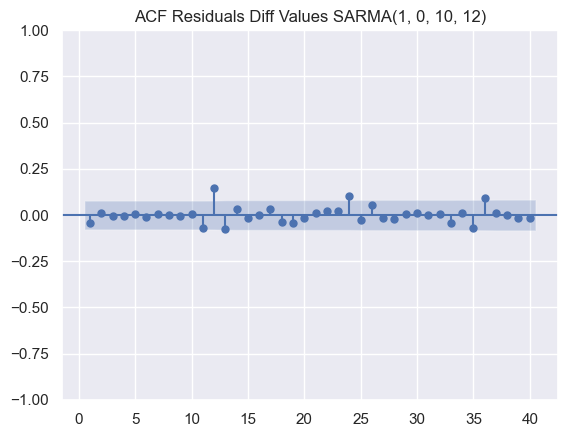

In [946]:
sgt.plot_acf(df.res_sarma[13:], lags = 40, zero = False)
plt.title('ACF Residuals Diff Values SARMA(1, 0, 10, 12)', size = 12)
plt.show()

In [966]:
def fourier_transform(time_series):
    fourier = np.fft.fft(time_series)
    frequency = np.fft.fftfreq(len(time_series))
    plt.figure(figsize = (20, 7))
    plt.plot(frequency, np.abs(fourier))
    plt.title('Fourier Transform - Frequency Spectrum')
    plt.show()

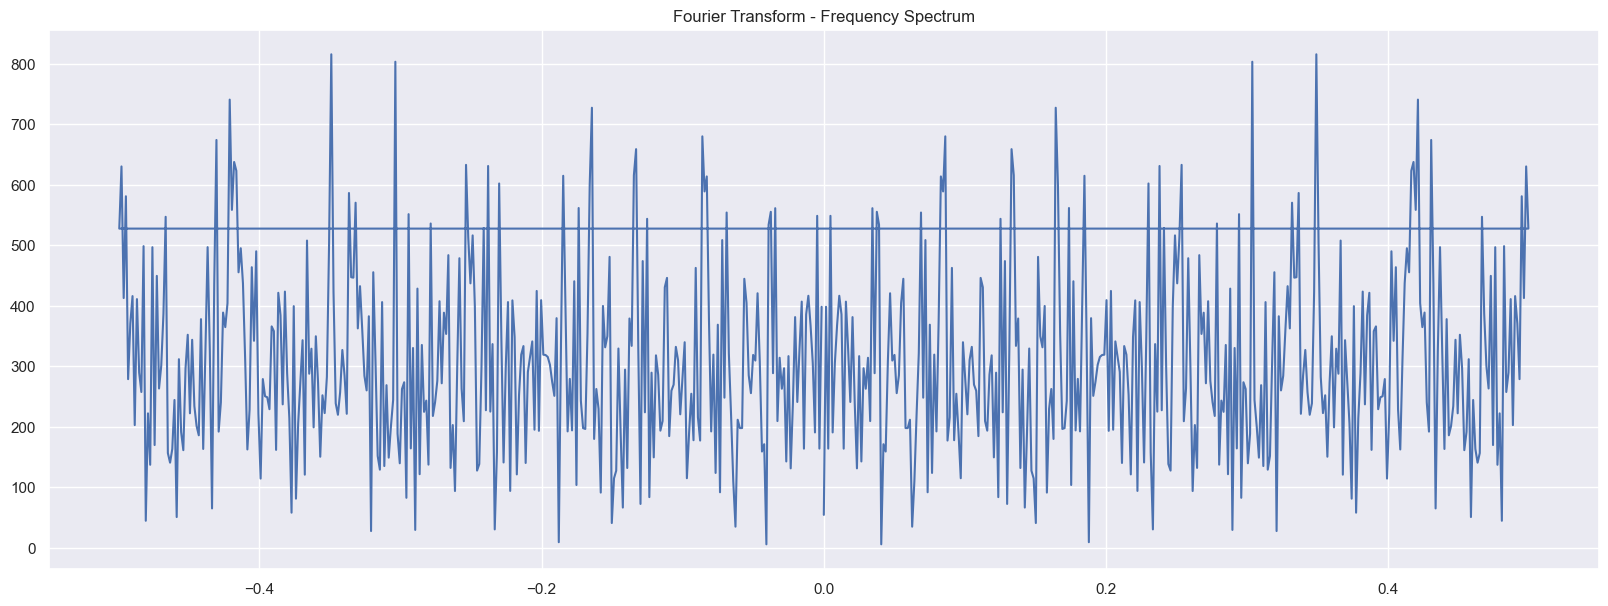

In [968]:
fourier_transform(df.res_sarma[13:])

In [976]:
df.tail(1)

,realtime_start,value,realtime_end,diff_values,log_values,returns,diff_seasonal,res_ar1_ma1,res_ar1_ma9,res_ar1_ma10,res_sarima,res_sarma
date,,,,,,,,,,,,
2006-04-30,2019-12-06,298281.0,2019-12-06,221.0,12.605791,0.074146,18.0,4.545531,0.222136,-3.586221,-8.097327,-8.097327


In [978]:
df_test.head(1)

,realtime_start,value,realtime_end
date,,,
2006-05-01,2019-12-06,298496.0,2019-12-06


In [1106]:
start_date = '2007-06-01'
end_date = '2014-12-01' # df_test.tail(1)

In [1055]:
df_test['diff_values'] = df_test.value.diff(1)
df_test['diff_seasonal'] = df_test.diff_values.diff(12)
df_test['diff_seasonal'] = df_test.diff_seasonal[13:]

In [1073]:
df_pred = model_diff_s_ar1_ma10.fit().predict(start = start_date, end = end_date)

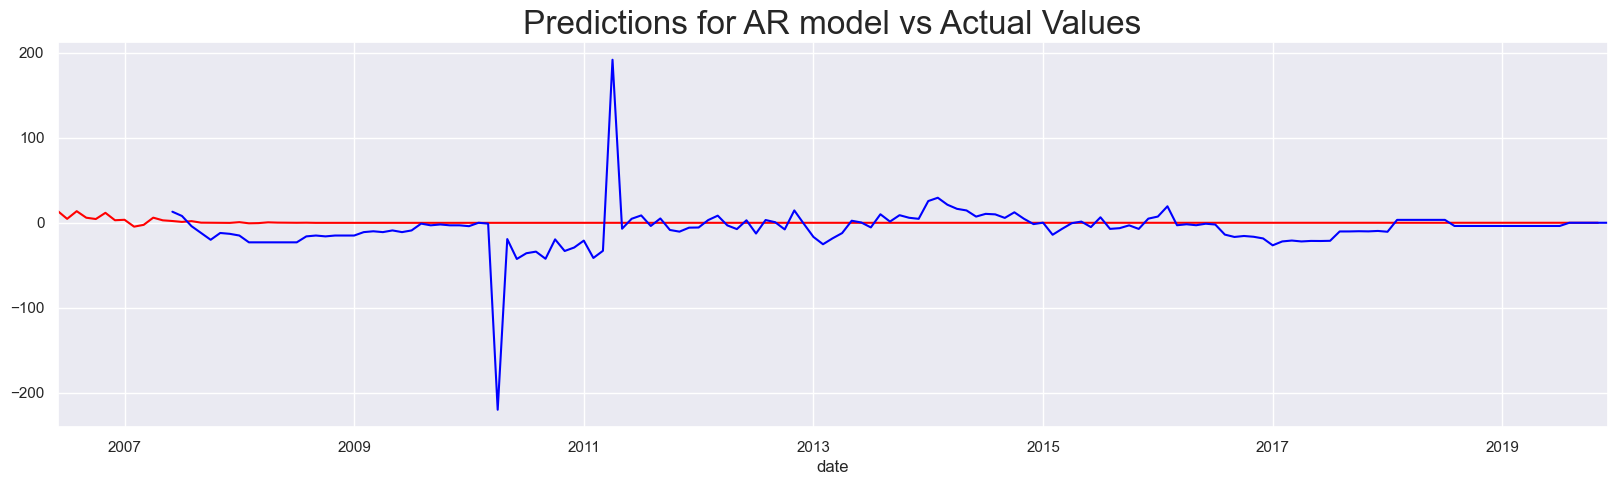

In [1075]:
df_pred[start_date:end_date].plot(figsize = (20,5), color = 'red')
df_test.diff_seasonal[start_date:end_date].plot(color = 'blue')
plt.title('Predictions for AR model vs Actual Values', size = 24)
plt.show()

In [1084]:
from pmdarima.arima import auto_arima
from arch import arch_model
import sklearn

In [1133]:
mod_garch = arch_model(df.diff_seasonal[13:], vol = 'GARCH', p = 1, q = 10,
                       mean = 'constant', dist = 'Normal')
res_garch = mod_garch.fit(last_obs = start_date, update_freq = 10)

Iteration:     10,   Func. Count:    148,   Neg. LLF: 2750.799185271353
Iteration:     20,   Func. Count:    290,   Neg. LLF: 2802.8768988898673
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2743.4549651833486
            Iterations: 27
            Function evaluations: 388
            Gradient evaluations: 27


In [1135]:
pred_garch = res_garch.forecast(horizon = 1, align = 'target')

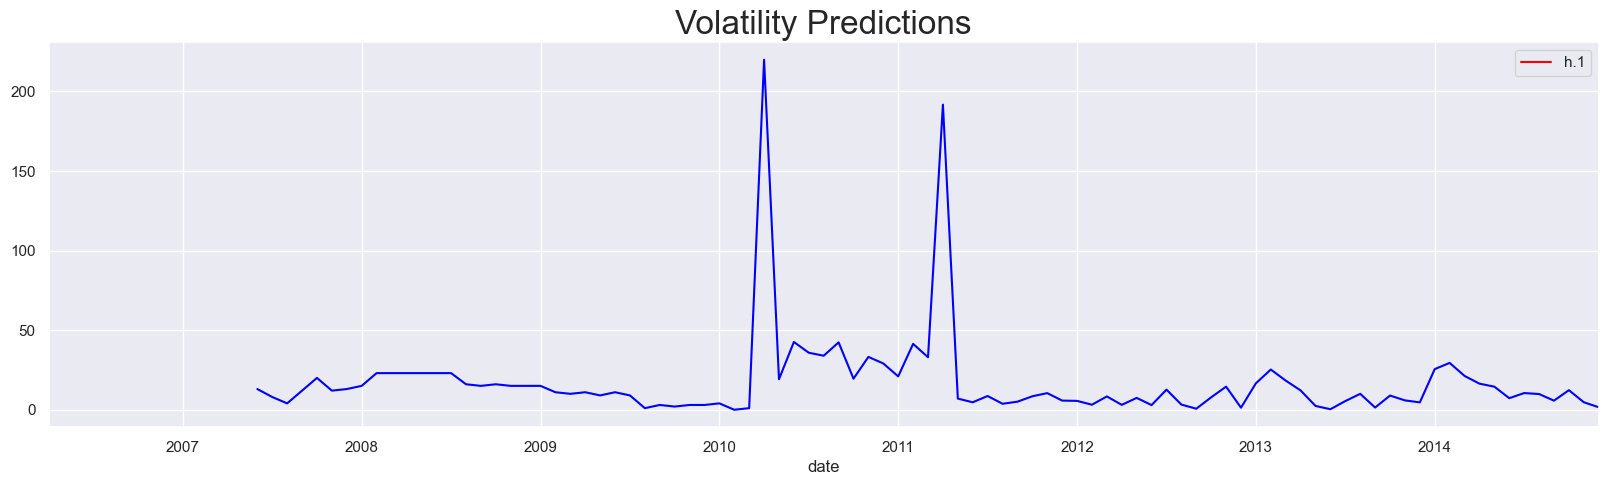

In [1137]:
pred_garch.residual_variance['1952-01-01':end_date].plot(figsize = (20, 5), 
                                                       color = 'red',zorder = 2)
df_test.diff_seasonal[13:]['1952-01-01':end_date].abs().plot(color = 'blue', zorder = 1)
plt.title('Volatility Predictions', size = 24)
plt.show()

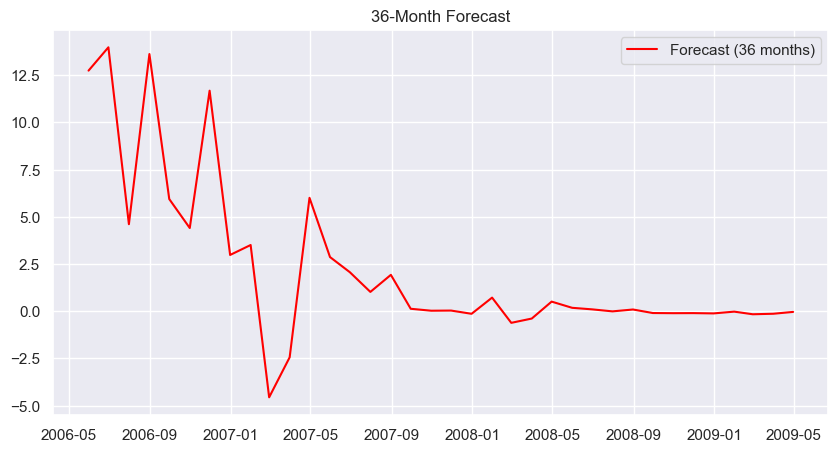

In [1169]:
forecast_diff = model_diff_s_ar1_ma10.fit().get_forecast(steps=36)
forecast_diff_mean = forecast_diff.predicted_mean
plt.figure(figsize=(10, 5))
plt.plot(forecast_diff_mean, label='Forecast (36 months)', color='red')
plt.title('36-Month Forecast')
plt.legend()
plt.show()

In [1159]:
forecast_diff = model_diff_s_ar1_ma10.fit().forecast(steps=36)
# print(forecast_diff)

<Axes: xlabel='date'>

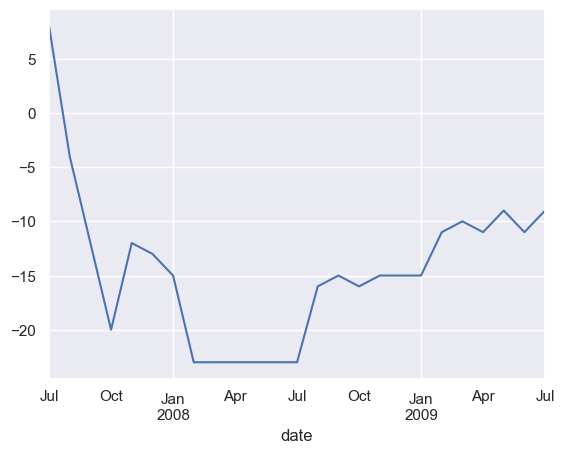

In [1167]:
df_test.diff_seasonal['2007-07-01':'2009-07-01'].plot()

In [1179]:
forecast_diff = model_diff_s_ar1_ma10.fit().get_forecast(steps=36).predicted_mean
forecast_actual = df['value'].iloc[-1] + forecast_diff.cumsum()
print(forecast_actual)

2006-05-31    298293.742946
2006-06-30    298307.721193
2006-07-31    298312.327881
2006-08-31    298325.948330
2006-09-30    298331.886872
2006-10-31    298336.290900
2006-11-30    298347.970401
2006-12-31    298350.947625
2007-01-31    298354.451961
2007-02-28    298349.888011
2007-03-31    298347.442836
2007-04-30    298353.446659
2007-05-31    298356.312567
2007-06-30    298358.375679
2007-07-31    298359.395416
2007-08-31    298361.319037
2007-09-30    298361.445209
2007-10-31    298361.468422
2007-11-30    298361.499603
2007-12-31    298361.359931
2008-01-31    298362.077204
2008-02-29    298361.458327
2008-03-31    298361.067112
2008-04-30    298361.572883
2008-05-31    298361.750233
2008-06-30    298361.846010
2008-07-31    298361.834685
2008-08-31    298361.922095
2008-09-30    298361.822491
2008-10-31    298361.714985
2008-11-30    298361.611227
2008-12-31    298361.492232
2009-01-31    298361.466612
2009-02-28    298361.302377
2009-03-31    298361.164828
2009-04-30    298361

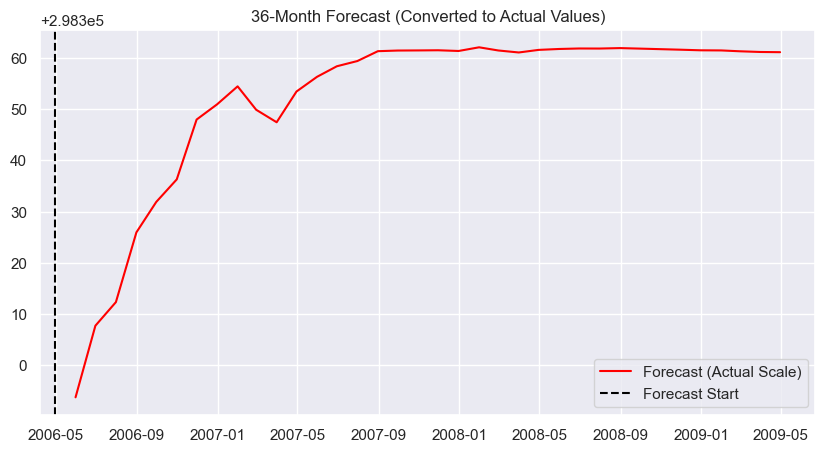

In [1181]:
plt.figure(figsize=(10, 5))
plt.plot(forecast_actual, color='red', label='Forecast (Actual Scale)')
plt.axvline(df.index[-1], color='black', linestyle='dashed', label='Forecast Start')
plt.title('36-Month Forecast (Converted to Actual Values)')
plt.legend()
plt.show()